In [1]:
import jieba
import jieba.analyse
import pandas as pd
import numpy as np
from collections import Counter

# 將csv檔讀入

In [5]:
orgdata = pd.read_csv('Tainan_food.csv')
orgdata.head()

,id,name,summary,introduction,open_time,district,address,tel,category
0,1052,和興冰果部,豐昌商店對面的「和興冰果室」，店主人黃漢津經營冰果室已超過70年了，帶給當地街坊鄰居口中甜蜜...,豐昌商店對面的「和興冰果室」，店主人黃漢津經營冰果室已超過70年了，帶給當地街坊鄰居口中甜蜜...,週二~週日09:00~17:00，週一休息,後壁區,731 臺南市後壁區菁寮里菁寮46號,-6620997,飲料冰品
1,1053,曾家豬頭飯｜ 炎師,創店已有46年的歷史，主要餐點為豬頭飯，堅持採用傳統道地作法，米粒香Q具彈性，又因口味道地，...,創店已有46年的歷史，主要餐點為豬頭飯，堅持採用傳統道地作法，米粒香Q具彈性，又因口味道地，...,週一~週日07:00–13:00，週二休息,新營區,730 臺南市新營區新進路二段87號,-6332733,地方小吃、中式美食
2,1054,籃記東山鴨頭,配料及烹滷，由老闆獨特方式，以維持其咬勁，口味特殊的風格，持續在每天籃記堅持依循古法製作，絕...,"配料及烹滷,由老闆獨特方式,以維持其咬勁,口味特殊的風格,持續在每天籃記堅持依循古法製作，絕...",週一~週日13:00-18:00,東山區,733 臺南市東山區中興路11號,-6801976,中式美食、伴手好禮
3,1055,西井村蜂蜜滷味 安平店,何謂豬蹄花：“軟嫩滑Q有彈性、富含膠質”的養生聖品就是它的代名詞，西井村滷味特地嚴選CAS認...,何謂豬蹄花：&ldquo;軟嫩滑Q有彈性、富含膠質&rdquo;的養生聖品就是它的代名詞，西...,週一~週五12:00–19:10 週六~週日10:00–21:30,安平區,708 臺南市安平區安平路418號,-2288739,中式美食、伴手好禮
4,1056,廣興肉脯店,肉干利用整塊原肉切片，配合熬煮4小時的秘方醬料一起醃製，經過一整晚後透過陽光的曝曬和含有些許...,肉干利用整塊原肉切片，配合熬煮4小時的秘方醬料一起醃製，經過一整晚後透過陽光的曝曬和含有些許...,週一~週日08:00~20:00,中西區,700 臺南市中西區府前路一段90巷62號,-2226567,伴手好禮


In [10]:
documents = ['我是臺灣師範大學科技系113級李招蓁']#一段字串
# 精確模式
for sentence in documents:
    seg_list = jieba.cut(sentence)#用jieba做cut斷詞
    print('/'.join(seg_list))#印出來的內容用斜線隔開

我/是/臺/灣師/範大學/科技/系/113/級/李招蓁


In [14]:
jieba.load_userdict('./userdict.txt')#自己建立斷詞文本

for sentence in documents:
    seg_list = jieba.cut(sentence)
    print('/'.join(seg_list))

我/是/臺灣/師範大學/科技系/113級/李招蓁


In [15]:
#新增一個新欄位
orgdata['seg'] = ""
orgdata.head()

,id,name,summary,introduction,open_time,district,address,tel,category,seg
0,1052,和興冰果部,豐昌商店對面的「和興冰果室」，店主人黃漢津經營冰果室已超過70年了，帶給當地街坊鄰居口中甜蜜...,豐昌商店對面的「和興冰果室」，店主人黃漢津經營冰果室已超過70年了，帶給當地街坊鄰居口中甜蜜...,週二~週日09:00~17:00，週一休息,後壁區,731 臺南市後壁區菁寮里菁寮46號,-6620997,飲料冰品,
1,1053,曾家豬頭飯｜ 炎師,創店已有46年的歷史，主要餐點為豬頭飯，堅持採用傳統道地作法，米粒香Q具彈性，又因口味道地，...,創店已有46年的歷史，主要餐點為豬頭飯，堅持採用傳統道地作法，米粒香Q具彈性，又因口味道地，...,週一~週日07:00–13:00，週二休息,新營區,730 臺南市新營區新進路二段87號,-6332733,地方小吃、中式美食,
2,1054,籃記東山鴨頭,配料及烹滷，由老闆獨特方式，以維持其咬勁，口味特殊的風格，持續在每天籃記堅持依循古法製作，絕...,"配料及烹滷,由老闆獨特方式,以維持其咬勁,口味特殊的風格,持續在每天籃記堅持依循古法製作，絕...",週一~週日13:00-18:00,東山區,733 臺南市東山區中興路11號,-6801976,中式美食、伴手好禮,
3,1055,西井村蜂蜜滷味 安平店,何謂豬蹄花：“軟嫩滑Q有彈性、富含膠質”的養生聖品就是它的代名詞，西井村滷味特地嚴選CAS認...,何謂豬蹄花：&ldquo;軟嫩滑Q有彈性、富含膠質&rdquo;的養生聖品就是它的代名詞，西...,週一~週五12:00–19:10 週六~週日10:00–21:30,安平區,708 臺南市安平區安平路418號,-2288739,中式美食、伴手好禮,
4,1056,廣興肉脯店,肉干利用整塊原肉切片，配合熬煮4小時的秘方醬料一起醃製，經過一整晚後透過陽光的曝曬和含有些許...,肉干利用整塊原肉切片，配合熬煮4小時的秘方醬料一起醃製，經過一整晚後透過陽光的曝曬和含有些許...,週一~週日08:00~20:00,中西區,700 臺南市中西區府前路一段90巷62號,-2226567,伴手好禮,


In [65]:

jieba.analyse.set_stop_words('stopwords.txt') 
index = 0
for documents in orgdata['introduction']:
    seg_list = jieba.analyse.extract_tags(str(documents), 150) #前150個權重最高的單詞
    orgdata['seg'].iloc[index] = seg_list #存入seg_list
    index += 1
    

In [66]:
orgdata['seg']

0       [冰果, 豐昌, 對面, 興冰果, 漢津, 經營, 超過, 帶給, 當地, 鄰居, 相親, ...
1       [創店, 歷史, 餐點, 豬頭, 堅持, 採用, 傳統, 具彈性, 不油, 不膩, 好評, ...
2       [風格, 口味, 偷工, 依循, 獨特, 以維持, 持續, 籃記, 堅持, 絕不, 減料, ...
3       [彈性, 西井, 代名, 腿肉, 何謂, 豬蹄花, 軟嫩, 膠質, 養生, 聖品, 嚴選, ...
4       [整塊, 原肉, 小時, 醬料, 經過, 過陽光, 曝曬, 許蜜香, 龍眼, 現出, 灣艷陽...
                              ...                        
1325    [虎山, 雷創意, 蛋塔店, 蛋塔, 步道, 停靠站, 雪糕, 香酥, 林場, 台灣, 筆直...
1326    [大腸, 配上, 獨家, 嚴格, 關食材, 品質, 出處, 以統, 好味, 美的, 古早, ...
1327    [課程, 工藝, 體驗, 陶瓷, 深耕, 展演, 品牌, 周美智, 創立, 設計, 並獲, ...
1328    [台南, 火車, 機車, 汽車, 前站, 租車, 租車行, 遊客, 車行, 車種, 自由, ...
1329    [台南, 火車, 機車, 汽車, 前站, 租車, 租車行, 遊客, 車行, 車種, 自由, ...
Name: seg, Length: 1330, dtype: object

In [64]:
data_seg_list = orgdata['seg'].tolist()
type(data_seg_list)

list

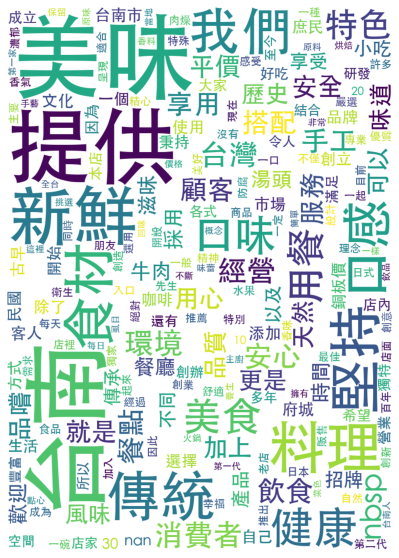

In [56]:
flat = [x for datalist in data_seg_list for x in datalist]
diction = Counter(flat)

from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

mask = np.array(Image.open("Taiwan.png"))
font = "/System/Library/Fonts/STHeiti Medium.ttc"

wordcloud = WordCloud(background_color = "white", font_path=font, mask = mask)
wordcloud.generate_from_frequencies(diction)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()